# Objective : Sentiment Classification - NLP


# Exploratory Data Analysis (EDA) - Python

# Insights - Patterns

# Classification (Using the ML)

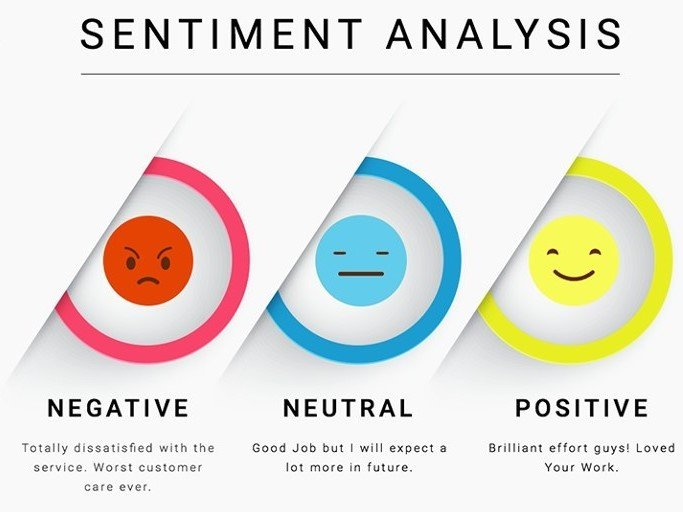


- In this Exercise, you are going to classify whether a given movie review is **positive or negative**.
- Are going to use Bag of words for pre-processing the text and apply different classification algorithms.
- Sklearn CountVectorizer has the inbuilt implementations for Bag of Words.

# 1. Load Python Modules

In [11]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import nltk
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize, sent_tokenize

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.ensemble import RandomForestClassifier
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91956\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# 2. Read the Dataset from CSV file  - Using Pandas

### **About Data: IMDB Dataset**

Credits: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?resource=download


- This data consists of two columns.
        - review
        - sentiment
- Reviews are the statements given by users after watching the movie.
- sentiment feature tells whether the given review is positive or negative.

In [12]:
#1. read the data provided in the same directory with name 'movies_sentiment_data.csv' and store it in df variable
movies_df=pd.read_csv("movies_sentiment_data.csv")

#2. print the shape of the data
print(movies_df.shape)

#3. print top 5 datapoints
print(movies_df.head(5))


(19000, 2)
                                              review sentiment
0  I first saw Jake Gyllenhaal in Jarhead (2005) ...  positive
1  I enjoyed the movie and the story immensely! I...  positive
2  I had a hard time sitting through this. Every ...  negative
3  It's hard to imagine that anyone could find th...  negative
4  This is one military drama I like a lot! Tom B...  positive


In [13]:
#creating a new column "Category" which represent 1 if the sentiment is positive or 0 if it is negative
movies_df["Category"]=movies_df["sentiment"].apply(lambda x: 1 if x=='positive' else 0)

In [14]:
#check the distribution of 'Category' and see whether the Target labels are balanced or not.
movies_df["Category"].value_counts()

Category
1    9500
0    9500
Name: count, dtype: int64

# 3. Preproseeing the Text

In [15]:
def pre_processing(text):
    words =  word_tokenize(text) 
    eng_stopwords=stopwords.words("english")
    tokens = [word for word in words if word.isalnum()]
    lower_tokens = [word.lower() for word in tokens ]

    no_punctuations_stopwords_tokens = [token for  token in lower_tokens if token not in eng_stopwords]
    return " ".join(no_punctuations_stopwords_tokens)

In [16]:
movies_df["processed_review"]=movies_df["review"].apply(pre_processing)

In [17]:
print(movies_df.head(5))

                                              review sentiment  Category  \
0  I first saw Jake Gyllenhaal in Jarhead (2005) ...  positive         1   
1  I enjoyed the movie and the story immensely! I...  positive         1   
2  I had a hard time sitting through this. Every ...  negative         0   
3  It's hard to imagine that anyone could find th...  negative         0   
4  This is one military drama I like a lot! Tom B...  positive         1   

                                    processed_review  
0  first saw jake gyllenhaal jarhead 2005 little ...  
1  enjoyed movie story immensely seen original 19...  
2  hard time sitting every single twist turn pred...  
3  hard imagine anyone could find short favorite ...  
4  one military drama like lot tom berenger playi...  


# 4. CountVectorizer (BOW)

In [19]:
count_vec=CountVectorizer()
X = count_vec.fit_transform(movies_df['processed_review'])

# 5. Train Test Split

In [21]:
#Do the 'train-test' splitting with test size of 20%
X_train,X_test,y_train,y_test=train_test_split(X,movies_df["Category"],test_size=0.2)
#print(len(X_train))
#print(len(X_test))

In [22]:
def draw_heatmap(conf_matrix):
    sns.heatmap(conf_matrix, annot=True)
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.title('Confusion Matrix')
    plt.show()

# 6. Random Forest - Model

 - using sklearn pipeline module create a classification pipeline to classify the movie review's positive or negative.


**Note:**
- use CountVectorizer for pre-processing the text.

- use **Random Forest** as the classifier with estimators as 50 and criterion as entropy.
- print the classification report.

**References**:

- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1946
           1       0.82      0.84      0.83      1854

    accuracy                           0.84      3800
   macro avg       0.84      0.84      0.84      3800
weighted avg       0.84      0.84      0.84      3800

[[1614  332]
 [ 294 1560]]


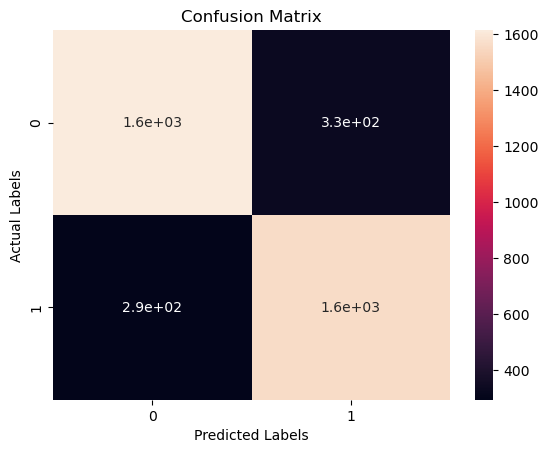

In [23]:
rf_clf = RandomForestClassifier(n_estimators = 50)


#2. fit with X_train and y_train
rf_clf.fit(X_train,y_train)

#3. get the predictions for X_test and store it in y_pred
y_pred=rf_clf.predict(X_test)

#4. print the classfication report
print(classification_report(y_pred,y_test))


print(confusion_matrix(y_pred,y_test))
conf_matrix = confusion_matrix(y_pred,y_test)
draw_heatmap(conf_matrix)

# 6. Multinomial Naive Bayes - Model
-  using sklearn pipeline module create a classification pipeline to classify the movie review's positive or negative.


**Note:**
- use CountVectorizer for pre-processing the text.
- use **Multinomial Naive Bayes** as the classifier.
- print the classification report.

**References**:

- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
- https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html



              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1974
           1       0.84      0.87      0.86      1826

    accuracy                           0.86      3800
   macro avg       0.86      0.86      0.86      3800
weighted avg       0.86      0.86      0.86      3800

[[1678  296]
 [ 230 1596]]


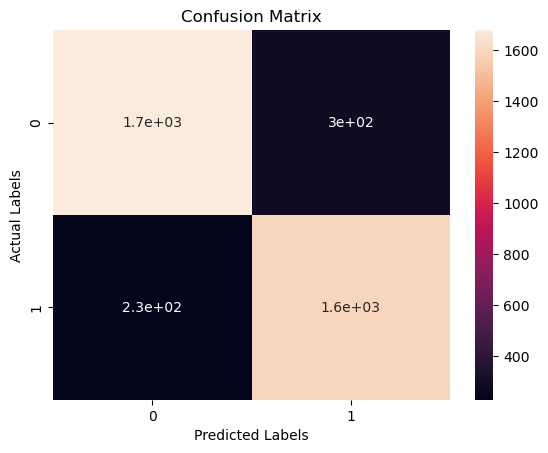

In [24]:
#1. create a pipeline object
mnb_clf = MultinomialNB()


#2. fit with X_train and y_train
mnb_clf.fit(X_train,y_train)

#3. get the predictions for X_test and store it in y_pred
y_pred=mnb_clf.predict(X_test)

#4. print the classfication report
print(classification_report(y_pred,y_test))

print(confusion_matrix(y_pred,y_test))
conf_matrix = confusion_matrix(y_pred,y_test)
draw_heatmap(conf_matrix)

# 7. Save the model

In [25]:
import pickle
pickle.dump(rf_clf, open('movie_review_rbf_model.pkl', 'wb'))
pickle.dump(mnb_clf, open('movie_review_mnb_model.pkl', 'wb'))

In [26]:
pickle.dump(count_vec, open('count_vectorizer_movie_review.pkl', 'wb'))